# **COGS 118A- Project Checkpoint**

# **Names**

- Drake Coy
- Aditi Krishnakumar
- Simran Nayyer
- Jasmine Qiang
- Luke Sztajnkrycer

# **Abstract**
Our project is centered around accurately predicting the price of flights to find the best booking times and routes. Our goal is to enable customers to plan their trips as efficiently and cost effective as possible. We will examine data collected from ‘Easemytrip,’ an online booking platform, between February 11th and March 31st of 2022 that includes flight information from India about airline companies, flight codes, source/destination cities, flight times, and more. There are 12 total features that mostly take the form of discrete categorical variables (‘Delhi,’ ‘morning,’ ‘economy,’ etc.), and includes 300,000 unique observations. We plan on implementing both a decision tree and linear regression model to make our predictions. Each method will be compared to evaluate which provides a higher success rate. We will measure the performance of our linear regression model by utilizing R-squared, adjusted R-squared, mean absolute error metrics to evaluate. We will then evaluate our decision tree success rate by using K-means cross validation (using ~⅕ of the data as a test set) to determine how generalizable our decision criteria are to any given portion of the data.

# **Background**

Groves & Gini used a standard PLS regression to construct their model, as well as lagged feature computation to weight temporal relationships in the data. <a name="groves"></a>[<sup>[1]</sup>](#grovesnote)

Wohlfarth et al. used a marked point process of returns to create a piecewise reconstruction of the price trajectory, which they then used to create an intensity image to perform clustering, feature-based classification, and model generation. <a name="Wohlfarth"></a>[<sup>[2]</sup>](#Wohlfarthnote)

Guo & Luh used a committee machine of neural networks, combining RBF and MLP networks to balance local data characteristics with global trends. <a name="Guo"></a>[<sup>[3]</sup>](#Guonote)

Etzioni et al. compared reinforcement learning and rule learning, where the system determined whether to buy or wait for each instance of a ticket price. They also compared those with a moving average model to predict the price of a flight based on its own history. <a name="Etzioni"></a>[<sup>[4]</sup>](#Etzioninote)

In general, most of the prior work seems to agree that for this task, it is important to choose a model that considers more general, long-term patterns as opposed to finer details.

# **Problem Statement**

When booking flights, there is often a tradeoff between aspects such as comfort (in terms of the airline) and or time spent (duration of the flight) that make the experience uncomfortable in the name of saving money. Our team intends to give insight into what factors influence flight pricing the most so that when readers of our work are booking flights in the future, they will be able to prioritize these factors in order to minimize their flight price. We plan to provide this service through linear regression by establishing relationships between flight price and other factors and through a decision tree by combining various results of our regression to categorize flights.

# **Data**
Dataset: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

Our dataset contains flight data to six metropolitan cities in India from Easemytrip which is an online platform for booking plane tickets. There are 300,261 observations in this dataset and 11 variables per observation. The 11 features are as follows: airline, flight (number), source city, departure time, stops, arrival time, destination city, class, duration, days left (from the booking date till fight date), and price. Some critical variables from this list include the airline, days left, destination city, and stops as we think that these variables logically should have the most influence on the price variable. The dataset seems to be cleaned already but depending on how we aim to explore the analysis, we may need to one-hot encode certain categorical variables.

# Main Data Cleaning

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn, etc.

In [2]:
#import datasets as Pandas dataframes
#NOTE: the filepath may be different for each user
main_dataset = pd.read_csv('Datasets/Clean_Dataset.csv')
business_df = pd.read_csv('Datasets/business.csv')
economy_df = pd.read_csv('Datasets/economy.csv')

In [3]:
main_dataset.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
print(list(main_dataset.columns))
print(main_dataset.shape)

['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']
(300153, 12)


In [5]:
business_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [6]:
print(list(business_df.columns))
print(business_df.shape)

['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to', 'price']
(93487, 11)


In [7]:
economy_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [8]:
print(list(economy_df.columns))
print(economy_df.shape)

['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to', 'price']
(206774, 11)


In [9]:
206774+93487

300261

In [10]:
business_df.loc[business_df['price'] == '25,612']

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
35,12-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
36,12-02-2022,Air India,AI,887,07:00,Delhi,02h 05m,non-stop,09:05,Mumbai,"25,612"
37,12-02-2022,Air India,AI,665,08:00,Delhi,02h 10m,non-stop,10:10,Mumbai,"25,612"
38,12-02-2022,Air India,AI,805,20:00,Delhi,02h 10m,non-stop,22:10,Mumbai,"25,612"
39,12-02-2022,Air India,AI,678,09:00,Delhi,02h 15m,non-stop,11:15,Mumbai,"25,612"
40,12-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
41,12-02-2022,Air India,AI,636,14:30,Delhi,03h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\...,18:00,Mumbai,"25,612"
42,12-02-2022,Air India,AI,441,17:50,Delhi,03h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\...,21:35,Mumbai,"25,612"


In [11]:
main_dataset.loc[main_dataset['price'] == 25612]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206666,206666,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,1,25612
206667,206667,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,Business,2.25,1,25612
206701,206701,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,2,25612
206702,206702,Air_India,AI-887,Delhi,Early_Morning,zero,Morning,Mumbai,Business,2.08,2,25612
206703,206703,Air_India,AI-665,Delhi,Early_Morning,zero,Morning,Mumbai,Business,2.17,2,25612
206704,206704,Air_India,AI-805,Delhi,Evening,zero,Night,Mumbai,Business,2.17,2,25612
206705,206705,Air_India,AI-678,Delhi,Morning,zero,Morning,Mumbai,Business,2.25,2,25612
206706,206706,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,Business,2.25,2,25612
206707,206707,Air_India,AI-636,Delhi,Afternoon,one,Evening,Mumbai,Business,3.50,2,25612
206708,206708,Air_India,AI-441,Delhi,Evening,one,Night,Mumbai,Business,3.75,2,25612


In [12]:
len(main_dataset.loc[main_dataset['price'] == 25612]) == len(business_df.loc[business_df['price'] == '25,612'])

True

We can see that the cleaned dataset is a combination of the business and economy class flights with a few modifications (~100 dropped flights, prices converted from strings to ints, etc.).

However, there are some immediate, glaring issues that should be taken care of:

- We need to drop the unnamed column
- We should convert the 'stops' (number of stops per flight) from categorical data to numerical data
- We should fix some of the names for better readability (e.g. 'days_left' refers to number of days between booking and vacation, but this isn't obvious)

Additionally, for quality of life, we may drop some columns we are less interested in working with. This would be done in a new dataframe, however, and will likely be done after we find some sort of test metric for usability (for example, we do not expect flight serial number to be a good predictor of price).

In [13]:
main_dataset = main_dataset.drop(columns = ['Unnamed: 0'])

In [14]:
print(main_dataset['stops'].unique())
def strtonum(ele):
    if ele == 'zero':
        num = 0
            
    elif ele == 'one':
        num = 1
            
    else:
        num = 2
            
    return num

main_dataset['stops'] = main_dataset['stops'].apply(strtonum)

['zero' 'one' 'two_or_more']


In [15]:
#main_dataset['days_left'] = main_dataset['days_left'].rename('hi') when we think of a name
main_dataset.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


In [16]:
main_dataset.isnull().any()

airline             False
flight              False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

# Exploratory Data Analysis

With all cleaning done, we'd like to begin looking at what features of the data might be good predictors of other features (in particular, we'd like to see which features correlate well with price)

We can do this in the following ways:

- Correlation Matrices (only works with integer data)
- Linear Regression (also only works with integer data)
- Multi-class scattar plots (allows us to compare two features (e.g. price and duration) with categorical data (e.g. airline))

Still need to figure out better ways of comparing/predicting integer data (price) using categorical data

Also, we have a lot of data, so figures get very overcomplicated very fast. We should stick to percentages whenever possible (like in corr matrices)

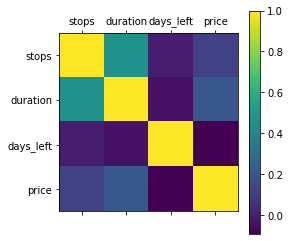

In [17]:
data_scalars_only = main_dataset[['stops', 'duration', 'days_left', 'price']]
corr_mat = data_scalars_only.corr()
plt.matshow(corr_mat) #not sure how to change figure size, corr matrix is kind of strange to work with
plt.xticks(range(data_scalars_only.shape[1]), data_scalars_only.columns) #optional: rotation=45
plt.yticks(range(data_scalars_only.shape[1]), data_scalars_only.columns)
plt.colorbar()

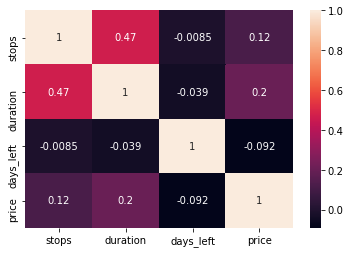

In [18]:
sns.heatmap(corr_mat, annot=True)
plt.show()
#works better because we can see numbers
#duration and stops have high correlation; makes sense
#highest correlation is only a 0.2 with price: duration and price

In [19]:
main_dataset['stops']

0         0
1         0
2         0
3         0
4         0
         ..
300148    1
300149    1
300150    1
300151    1
300152    1
Name: stops, Length: 300153, dtype: int64

<AxesSubplot:xlabel='price', ylabel='duration'>

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


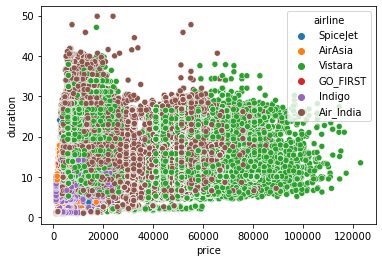

In [20]:
sns.scatterplot(data=main_dataset, x='price', y='duration', hue='airline') #oh dear god we have too much data
#can already see a slight trend: Vistara seems to be most expensive, Indigo the cheapest, Air india the longest fl

## Airlines

Text(0.5, 1.0, 'Distribution of Airlines')

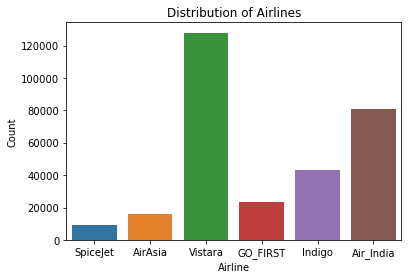

In [21]:
sns.countplot(x='airline', data = main_dataset)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Distribution of Airlines')

 - It is important to note that there is a significantly larger amount of data on Vistara airlines compared to the other airline types.

In [22]:
# group by airlines
df_airline = main_dataset.groupby('airline').mean().reset_index()
df_airline

,airline,stops,duration,days_left,price
0,AirAsia,0.988322,8.941714,27.735184,4091.072742
1,Air_India,0.963779,15.504235,25.497466,23507.019112
2,GO_FIRST,0.878393,8.755380,27.430415,5652.007595
3,Indigo,0.757004,5.795197,26.264309,5324.216303
4,SpiceJet,0.726778,12.579767,24.122850,6179.278881
5,Vistara,0.969951,13.326634,25.894532,30396.536302


Text(0, 0.5, 'Average Price in Rupees')

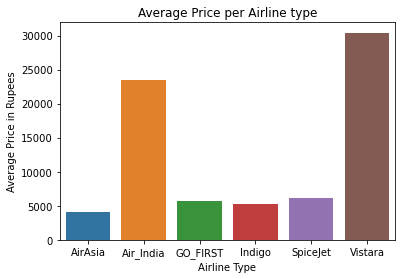

In [23]:
ax = sns.barplot(x = 'airline', y = 'price', data = df_airline)
plt.title('Average Price per Airline type')
plt.xlabel('Airline Type')
plt.ylabel('Average Price in Rupees')

 - Vistara (30396.5) and Air India (23507.0) are significantly more expensive on average in comparison to the other flights.
 
 - Air Asia (4091.1) is the least expensive on average.

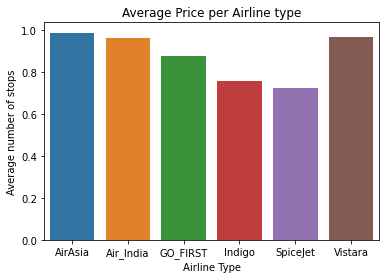

In [24]:
ax = sns.barplot(x = 'airline', y = 'stops', data = df_airline)
plt.title('Average Price per Airline type')
plt.xlabel('Airline Type')
plt.ylabel('Average number of stops')
plt.show()

 - The average number of stops range between 0.73 to 0.99 with spicejet having the least amount of stops on average

## Source and Destination City

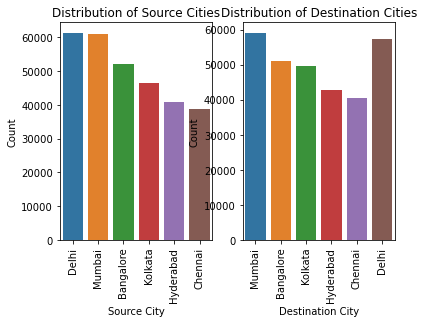

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.countplot(ax = ax1, x='source_city', data = main_dataset)
ax1.set_xlabel('Source City')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Source Cities')
ax1.tick_params(axis='x', rotation=90)

sns.countplot(ax = ax2, x='destination_city', data = main_dataset)
ax2.set_xlabel('Destination City')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Destination Cities')
ax2.tick_params(axis='x', rotation=90)

- Least number of observation for Chennai as both source and destination city
- Largest number of flights from Delhi and Largest number of flights to Mumbai
- Similar ranking between both source and destination cities

In [26]:
# group by source city
df_source = main_dataset.groupby('source_city').mean().reset_index()
df_source

,source_city,stops,duration,days_left,price
0,Bangalore,0.929371,12.029203,25.955398,21469.460575
1,Chennai,0.946434,12.838901,26.095736,21995.339871
2,Delhi,0.883214,11.515499,25.970168,18951.326639
3,Hyderabad,0.935549,12.268075,26.374553,20155.623879
4,Kolkata,0.967938,13.249898,26.013162,21746.235679
5,Mumbai,0.906595,11.888448,25.769755,21483.818839


In [27]:
# group by destination city
df_dest = main_dataset.groupby('destination_city').mean().reset_index()
df_dest

,destination_city,stops,duration,days_left,price
0,Bangalore,0.937260,12.058039,26.048582,21593.955784
1,Chennai,0.985781,13.338900,26.020437,21953.323969
2,Delhi,0.838668,10.513310,26.178644,18436.767870
3,Hyderabad,0.952722,13.381945,26.004166,20427.661284
4,Kolkata,0.980478,13.214953,25.887633,21959.557556
5,Mumbai,0.886644,11.583355,25.885967,21372.529469


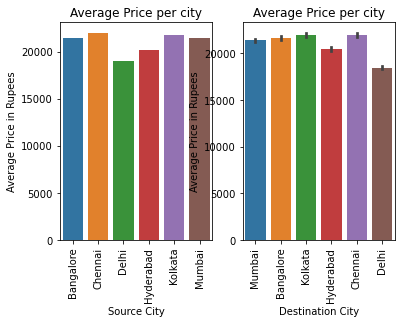

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.barplot(ax = ax1, x='source_city', y='price', data = df_source)
ax1.set_xlabel('Source City')
ax1.set_ylabel('Average Price in Rupees')
ax1.set_title('Average Price per city')
ax1.tick_params(axis='x', rotation=90)

sns.barplot(ax = ax2, x='destination_city', y='price', data = main_dataset)
ax2.set_xlabel('Destination City')
ax2.set_ylabel('Average Price in Rupees')
ax2.set_title('Average Price per city')
ax2.tick_params(axis='x', rotation=90)

- Highest average price between source cities is for flights from Chennai
- Lowest average price between source cities is for flights from Delhi
- Highest average price between destination cities is for flights to Kolkata
- Lowest average price between destination cities is for flights to Delhi



In [29]:
df_cities = main_dataset.groupby(['source_city','destination_city']).mean().reset_index()
df_cities['combined_cities'] = df_cities['source_city'] + '-' + df_cities['destination_city']

In [30]:
df_cities = df_cities.sort_values(by = 'price')
df_cities

,source_city,destination_city,stops,duration,days_left,price,combined_cities
17,Hyderabad,Delhi,0.838232,10.829817,26.541147,17243.945685,Hyderabad-Delhi
12,Delhi,Hyderabad,0.863208,12.518350,26.315073,17347.288379,Delhi-Hyderabad
1,Bangalore,Delhi,0.854972,9.779956,25.909494,17723.313972,Bangalore-Delhi
10,Delhi,Bangalore,0.877962,10.354125,25.875821,17880.216315,Delhi-Bangalore
27,Mumbai,Delhi,0.762307,9.818057,26.069282,18725.320008,Mumbai-Delhi
6,Chennai,Delhi,0.896146,11.149374,26.564551,18981.863948,Chennai-Delhi
14,Delhi,Mumbai,0.769246,10.367774,25.828373,19355.829812,Delhi-Mumbai
11,Delhi,Chennai,0.996197,12.433965,26.296568,19369.881354,Delhi-Chennai
22,Kolkata,Delhi,0.871788,11.604989,26.032362,19422.354559,Kolkata-Delhi
19,Hyderabad,Mumbai,0.955286,11.962923,26.107611,20080.865759,Hyderabad-Mumbai


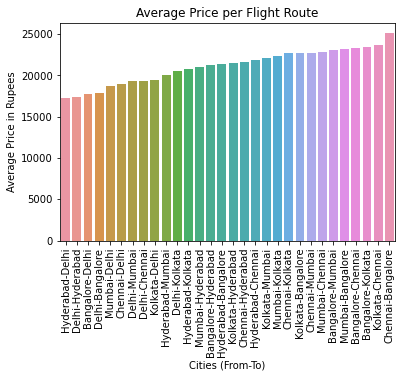

In [31]:
sns.barplot(x='combined_cities', y='price', data = df_cities)
plt.xticks(rotation=90)
plt.xlabel('Cities (From-To)')
plt.ylabel('Average Price in Rupees')
plt.title('Average Price per Flight Route')
plt.show()

 - Highest average price for flights from Chennai to Bangalore
 - Lowest average price for flights from Hyderabad to Delhi

In [32]:
# group by airlines
df_airline = main_dataset.groupby('airline').mean().reset_index()
df_airline

,airline,stops,duration,days_left,price
0,AirAsia,0.988322,8.941714,27.735184,4091.072742
1,Air_India,0.963779,15.504235,25.497466,23507.019112
2,GO_FIRST,0.878393,8.755380,27.430415,5652.007595
3,Indigo,0.757004,5.795197,26.264309,5324.216303
4,SpiceJet,0.726778,12.579767,24.122850,6179.278881
5,Vistara,0.969951,13.326634,25.894532,30396.536302


Text(0, 0.5, 'Average Duration')

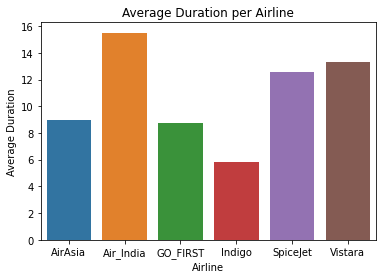

In [33]:
ax = sns.barplot(x = 'airline', y = 'duration', data = df_airline)
plt.title('Average Duration per Airline')
plt.xlabel('Airline')
plt.ylabel('Average Duration')

- Air_India has longer flights on average than the other airlines
- Indigo airlines has relatively short flights in comparison to the others

In [34]:
# group by airlines
df_class = main_dataset.groupby('class').mean().reset_index()
df_class

,class,stops,duration,days_left,price
0,Business,0.924920,13.704274,25.741857,52540.081124
1,Economy,0.924037,11.550060,26.123673,6572.342383


Text(0, 0.5, 'Average Duration')

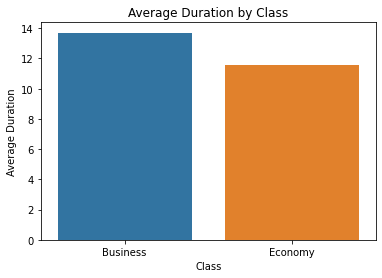

In [35]:
ax1 = sns.barplot(x = 'class', y = 'duration', data = df_class)
plt.title('Average Duration by Class')
plt.xlabel('Class')
plt.ylabel('Average Duration')

- Business class flights in this dataset on average have a higher duration than the economy flights
- Possible factor to consider when creating classifier => people prefer business class for longer flights

Text(0, 0.5, 'Average Duration')

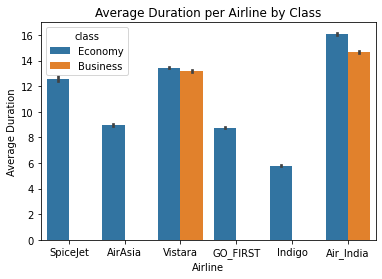

In [36]:
ax2 = sns.barplot(x = 'airline', y = 'duration', hue = 'class', data = main_dataset)
plt.title('Average Duration per Airline by Class')
plt.xlabel('Airline')
plt.ylabel('Average Duration')

- Important to note that only Vistara and Air_India provide business class flights
- As reflected in the earlier plot, Air_India still has the highest average duration and Indigo has the lowest

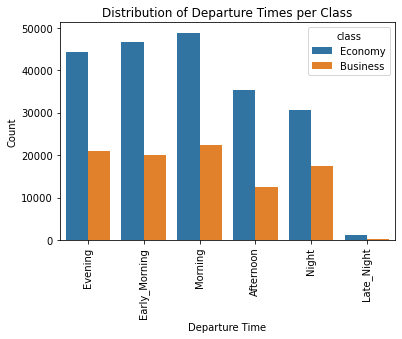

In [37]:
ax3 = sns.countplot(x='departure_time', hue = 'class', data = main_dataset)
ax3.set_xlabel('Departure Time')
ax3.set_ylabel('Count')
ax3.set_title('Distribution of Departure Times per Class')
ax3.tick_params(axis='x', rotation=90)

- Rarely any flight from either class departs late at night
- Need to consider that only two airlines offer business class so distribution of business class may look skewed because of this
- Most of the economy class flights depart in the morning 

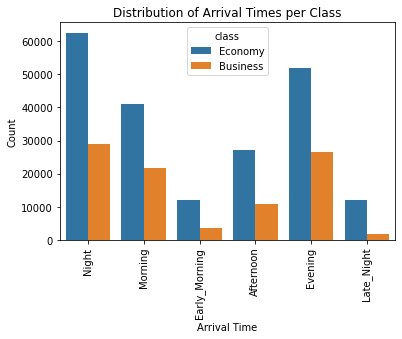

In [38]:
ax4 = sns.countplot(x='arrival_time', hue = 'class', data = main_dataset)
ax4.set_xlabel('Arrival Time')
ax4.set_ylabel('Count')
ax4.set_title('Distribution of Arrival Times per Class')
ax4.tick_params(axis='x', rotation=90)

- Most of the economy class flights arrive at night
- Similar number of business class flights arrive at evening and at night

Text(0.5, 1.0, 'Distribution of Days Left')

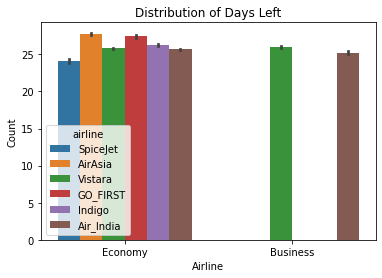

In [39]:
ax5 = sns.barplot(x='class', y = 'days_left', hue = 'airline', data = main_dataset)
ax5.set_xlabel('Airline')
ax5.set_ylabel('Count')
ax5.set_title('Distribution of Days Left')

 - Most of them look relatively similar
 - SpiceJet has the lowest on average days left, could possibly mean that they offer better deals closer to desired dates when passengers are booking

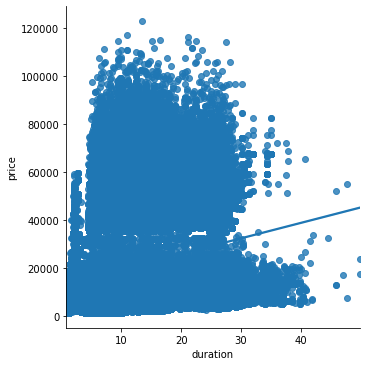

In [40]:
sns.lmplot(x="duration", y="price", data=main_dataset)

- No clear relationship shown by scatterplot between the two variables

Text(0.5, 1.0, 'Number of Stops and Price')

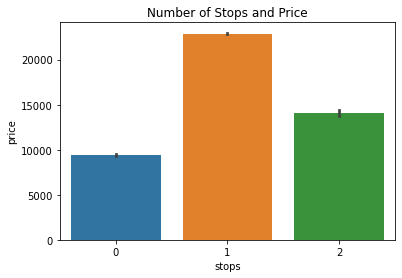

In [41]:
ax6 = sns.barplot(x = 'stops', y = 'price', data = main_dataset)
ax6.set_title('Number of Stops and Price')

 - Things to consider: whether the no stop flights are shorter/longer and how that impacts price, whether all airlines offer multiple stops
 - Interesting to see that flights with one stop tend to be higher priced than those with zero

Text(0.5, 1.0, 'Number of Stops and Duration')

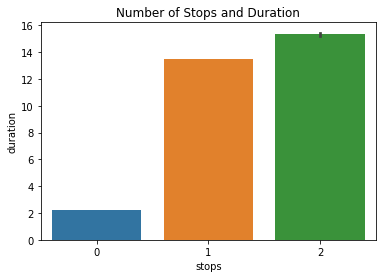

In [42]:
ax7 = sns.barplot(x = 'stops', y = 'duration', data = main_dataset)
ax7.set_title('Number of Stops and Duration')

- Pattern looks to be that longer flights have more stops (as expected) 
- Flights with one stop tend to be almost as long as those with two, but tend to be greater in price as seen by the previous plot which could mean that price is greatly influenced by both duration and number of stops together

In [43]:
main_dataset['airline'].value_counts()
# Noted in Aditi's EDA

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

Separating out points for all the airlines:

[Text(0.5, 1.0, 'SpiceJet price vs. duration')]

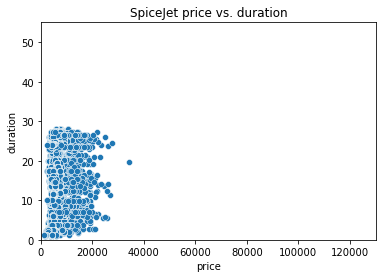

In [44]:
pl1 = sns.scatterplot(data=main_dataset.loc[main_dataset['airline'] == 'SpiceJet'], x='price', y='duration')
pl1.set_ylim(0, 55)
pl1.set_xlim(0, 130000)
pl1.set(title='SpiceJet price vs. duration')

[Text(0.5, 1.0, 'AirAsia price vs. duration')]

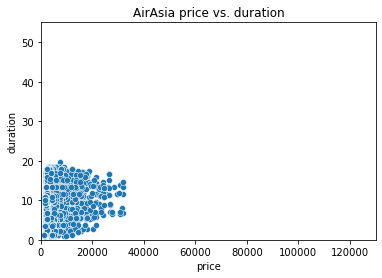

In [45]:
pl2 = sns.scatterplot(data=main_dataset.loc[main_dataset['airline'] == 'AirAsia'], x='price', y='duration', palette=['orange'])
pl2.set_ylim(0, 55)
pl2.set_xlim(0, 130000)
pl2.set(title='AirAsia price vs. duration')

[Text(0.5, 1.0, 'Vistara price vs. duration')]

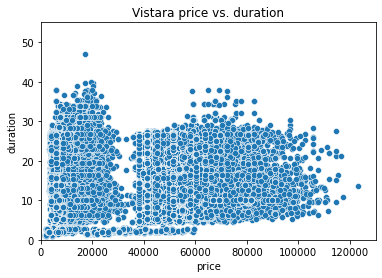

In [46]:
pl3 = sns.scatterplot(data=main_dataset.loc[main_dataset['airline'] == 'Vistara'], x='price', y='duration')
pl3.set_ylim(0, 55)
pl3.set_xlim(0, 130000)
pl3.set(title='Vistara price vs. duration')

[Text(0.5, 1.0, 'GO FIRST price vs. duration')]

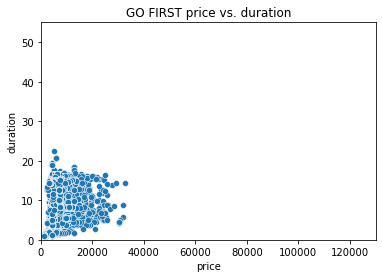

In [47]:
pl4 = sns.scatterplot(data=main_dataset.loc[main_dataset['airline'] == 'GO_FIRST'], x='price', y='duration')
pl4.set_ylim(0, 55)
pl4.set_xlim(0, 130000)
pl4.set(title='GO FIRST price vs. duration')

[Text(0.5, 1.0, 'Indigo price vs. duration')]

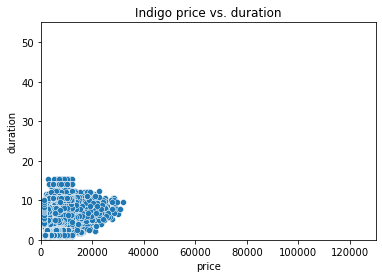

In [48]:
pl5 = sns.scatterplot(data=main_dataset.loc[main_dataset['airline'] == 'Indigo'], x='price', y='duration')
pl5.set_ylim(0, 55)
pl5.set_xlim(0, 130000)
pl5.set(title='Indigo price vs. duration')

[Text(0.5, 1.0, 'Air India price vs. duration')]

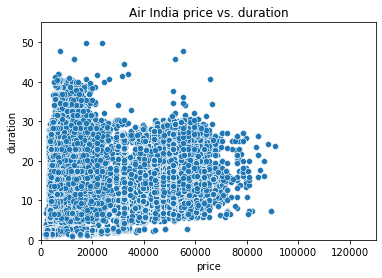

In [49]:
pl6 = sns.scatterplot(data=main_dataset.loc[main_dataset['airline'] == 'Air_India'], x='price', y='duration')
pl6.set_ylim(0, 55)
pl6.set_xlim(0, 130000)
pl6.set(title='Air India price vs. duration')

- Looking at these separated scatterplots, it seems that AirAsia, Go First, and Indigo are all quite similar in terms of both price and duration, with SpiceJet being similar in terms of price but with more longer-duration flights than the other three. It may also be worth noting that the plot of Vistara flights (and, to a lesser degree, Air India flights) seems to form three clusters.

Text(0.5, 1.0, 'Vistara')

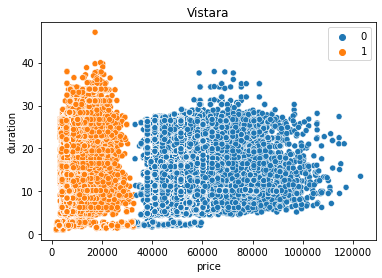

In [50]:
from sklearn.cluster import KMeans

vis = main_dataset.loc[main_dataset['airline'] == 'Vistara'][['price', 'duration']]
kmeans = KMeans(n_clusters=2).fit_predict(vis)
sns.scatterplot(data=main_dataset.loc[main_dataset['airline'] == 'Vistara'], x='price', y='duration', hue=kmeans)
plt.title('Vistara')

Text(0.5, 1.0, 'Air India')

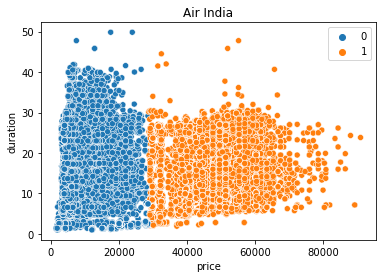

In [51]:
airin = main_dataset.loc[main_dataset['airline'] == 'Air_India'][['price', 'duration']]
kmeans2 = KMeans(n_clusters=2).fit_predict(airin)
sns.scatterplot(data=main_dataset.loc[main_dataset['airline'] == 'Air_India'], x='price', y='duration', hue=kmeans2)
plt.title('Air India')
# this is less obvious

- Is there a way to get the third cluster (at the bottom) to show up as well because this aint it

<AxesSubplot:xlabel='price', ylabel='duration'>

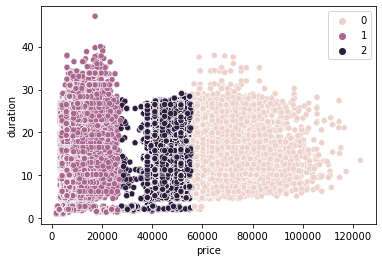

In [52]:
from sklearn.cluster import KMeans

vis = main_dataset.loc[main_dataset['airline'] == 'Vistara'][['price', 'duration']]
kmeans = KMeans(n_clusters=3).fit_predict(vis)
sns.scatterplot(data=main_dataset.loc[main_dataset['airline'] == 'Vistara'], x='price', y='duration', hue=kmeans)

# **Proposed Solution**

There is no true way to determine the best tradeoff between comfort, price, and time when it comes to flights. This is primarily due to the fact that individuals have different preferences, available time, amounts of money, etc. Thus, we opt for a solution that takes into account all of these variables, and more, to arrange groups of flights/tickets that have a broad appeal to different consumer groups. For example, we may group a set of flights that share characteristics of low price, medium-to-long flight time, and free luggage booking to cater to individuals who like to travel often and cheaply. We may group another set of flights based on quality of service and amount of reroutes to cater to individuals with greater amounts of money who prefer nice, one-and-done flights.

Notably, while we have some broad ideas of consumer/ticket groups in mind (such as the examples described above), we aim to construct these groups analytically, with variable contents and cutoff (e.g. tickets underneath x price, trip has less than x connecting flights) determined by their relationship to other variables in this dataset. As of now, the best way we believe we can approach this is through Linear Regression. Not only can we use regression to find relationships between our variables, but we can use these relationships to construct ideal ticket categories that appeal to a broad range of people. The fit of the relationship between any two variables can be described by the R-squared metric.

Once we have constructed these ticket categories, we will program a decision tree that classifies each flight by their assigned categories. This should give us a better idea of how each flight grouping is oriented in space (though we may have to resort to dimensionality-reducing methods such as PCA or scrap this visualization if the groups are too hyper-dimensional), and provide us with a simple-yet-effective set of criteria that allow us to arrive at any given group. In the real world, this might translate to a customer being offered a range of tickets that suit their preferences after answering a short list of questions. The shorter the list and the better the accuracy of each group, the better, which means we desire to make our tree as simple and accurate as possible. We plan to use K-means cross validation to ensure that our model is generalizable to any given portion of the dataset (since we likely do not have other datasets to work with, we can treat this set as 5-10 smaller datasets), and we are also considering comparing our performance to other decision tree models specified in lecture (assuming they are not copyrighted). plan to use GridSearchCV (or a related function, if there is a more applicable one) with a param grid to test how changing hyper-parameters and their parameters affects our tree.

Additionally, we will try operationalizing the same idea listed above using random forests instead of decision trees. We will again use a parameter grid to select both parameters and hyperparameters for the model.

All data cleaning, modeling, and visualization will likely be done using a combination of functions from the Pandas, NumPy, and Scikit-Learn libraries. We will create our own functions when needed and specify clearly which functions we use in our final project submission.

# **Evaluation Metrics**

Since we are using a regression model to predict continuous data (price), our primary evaluation metric will be an R Square Score which indicates the percentage of variance in the dependent variable that is explained by the independent variables (i.e. how well the model fits our dependent variable (price)). It is a score between 0 and 1 where 1 indicates a perfect fit between predicted and actual values.

$$
R^2 = \frac{Variance \: explained \: by \: the \: model}{Total \: Variance} \\
= 1 - \frac{\sum(y_i - \hat y_i)^2}{\sum(y_i - \bar y)^2}
$$

The numerator contains the sum of the residuals squared and the denominator is the sum squared of the distance between the data and the mean.

Since R Square does not account for the problem of overfitting, we will additionally look at Adjusted R Square which penalizes additional independent variables added to the model and adjusts the evaluation metric to account for overfitting. It is always less than or equal to the R Square score.

$$
R^2_{adj} = 1 - \frac{(1-R^2)(n-1)}{n-k-1}
$$

 N is the number of sample data points and k is the number of independent variables in the model.

We will supplement our evaluation with Mean Absolute Error as another evaluation metric. This will help us understand how far off our price predictions are from the ground truth.

$$
MAE = \frac{|(y_i - y_p)|}{n}\\
y_i = actual \: value\\
y_p = predicted \: value\\
n = number \: of \: observations/rows
$$

# **Preliminary results**


Using ExtraTreesRegressor to determine which features play the largest role in determining flight price

In [53]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder

extra_trees_data = main_dataset

#Label Encoder encodes target labels with values between 0 and n_classes-1
#Labels are then normalized using the encoder
encoder = LabelEncoder()
extra_trees_data = extra_trees_data.drop(['flight'],axis=1)
extra_trees_data['airline'] = encoder.fit_transform(extra_trees_data['airline'])
extra_trees_data['source_city'] = encoder.fit_transform(extra_trees_data['source_city'])
extra_trees_data['departure_time'] = encoder.fit_transform(extra_trees_data['departure_time'])
extra_trees_data['stops'] = encoder.fit_transform(extra_trees_data['stops'])
extra_trees_data['arrival_time'] = encoder.fit_transform(extra_trees_data['arrival_time'])
extra_trees_data['destination_city'] = encoder.fit_transform(extra_trees_data['destination_city'])
extra_trees_data['class'] = encoder.fit_transform(extra_trees_data['class'])

X = extra_trees_data.drop('price', axis=1)
y = extra_trees_data['price']

In [54]:
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [55]:
data = {
    'Feature' : X.columns.tolist(),
    'Importance' : selection.feature_importances_
}

selection_output = pd.DataFrame(data).sort_values(by='Importance', ascending=False)
selection_output

,Feature,Importance
6,class,0.880373
3,stops,0.033953
7,duration,0.024671
8,days_left,0.018376
0,airline,0.011308
5,destination_city,0.010450
1,source_city,0.010429
4,arrival_time,0.005339
2,departure_time,0.005101


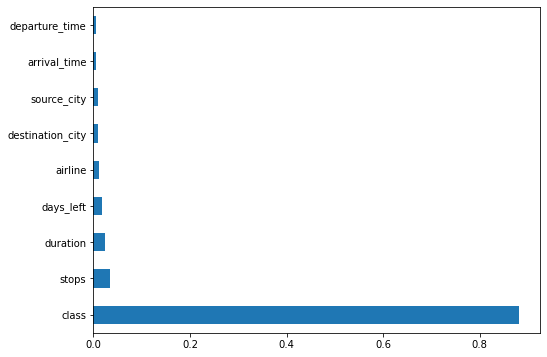

In [56]:
plt.figure(figsize = (8,6))
feature_importance_levels = pd.Series(selection.feature_importances_, index=X.columns)
feature_importance_levels.nlargest(20).plot(kind='barh')
plt.show()

- You can see that some features are vastly more 'important' to predicting price
- The 'class' of flight (business vs economy) is magnitude more influential

# Linear Regression

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [58]:
#using all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.9062046011722384

In [59]:
#dropping the four least impactful features
X1 = X.drop(['departure_time', 'arrival_time', 'destination_city', 'source_city'], axis=1)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.20)
reg1 = LinearRegression().fit(X1_train, y_train)
reg1.score(X1_train, y_train)

0.9056394235092139

In [60]:
#using just 'duration,' 'stops,' and 'class.'
X2 = X1.drop(['airline', 'days_left'], axis=1)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.20)
reg1 = LinearRegression().fit(X2_train, y_train)
reg1.score(X2_train, y_train)

0.8939888893591539

In [61]:
#using just 'class'
X3 = X2.drop(['duration', 'stops'], axis=1)
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size = 0.20)
reg1 = LinearRegression().fit(X3_train, y_train)
reg1.score(X3_train, y_train)

0.8799190340871547

Lets see what happens if we regress within each 'class' of ticket

In [62]:
business_trees = extra_trees_data[extra_trees_data['class'] == 1]
business_trees.get('class').unique()

array([1])

In [63]:
#Looking at all features within the the business class
XB = business_trees.drop('price', axis=1)
y = business_trees['price']
XB_train, XB_test, y_train, y_test = train_test_split(XB, y, test_size = 0.20)
reg1 = LinearRegression().fit(XB_train, y_train)
reg1.score(XB_train, y_train)

0.44651218081740685

In [64]:
economy_trees = extra_trees_data[extra_trees_data['class'] == 0]
economy_trees.get('class').unique()

array([0])

In [65]:
#Looking at all features within the the economy class
XE = economy_trees.drop('price', axis=1)
y = economy_trees['price']
XE_train, XE_test, y_train, y_test = train_test_split(XE, y, test_size = 0.20)
reg1 = LinearRegression().fit(XE_train, y_train)
reg1.score(XE_train, y_train)

0.45745563357733676

## Optimizing Linear Regression

In [66]:
from sklearn.model_selection import learning_curve

In [67]:
main_dataset.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956


In [68]:
main_dataset['flight'].unique()

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], dtype=object)

In [69]:
encoder = LabelEncoder()
data = main_dataset.drop(['flight'],axis=1)
data['airline'] = encoder.fit_transform(data['airline'])
data['source_city'] = encoder.fit_transform(data['source_city'])
data['departure_time'] = encoder.fit_transform(data['departure_time'])
data['arrival_time'] = encoder.fit_transform(data['arrival_time'])
data['destination_city'] = encoder.fit_transform(data['destination_city'])
data['class'] = encoder.fit_transform(data['class'])

X = data.drop('price', axis=1)
y = data['price']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print(X_train.shape, y_train.shape)

(240122, 9) (240122,)


### Learning Curve

__We can include a learning curve to check whether there is enough data to do train/validate/test split or whether we need to use other strategies such as K-Folds, LOOCV, etc__

In [71]:
# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(LinearRegression(),
                                                        X_train, y_train, cv = 5, scoring='neg_mean_squared_error')


In [75]:
train_scores_mean = -training_scores.mean(axis = 1)
validation_scores_mean = -testing_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = sizes))

print(sizes)

Mean training scores

 19209     4.971291e+07
62431     4.877829e+07
105653    4.834129e+07
148875    4.833976e+07
192097    4.830314e+07
dtype: float64

 --------------------

Mean validation scores

 19209     4.834004e+07
62431     4.832031e+07
105653    4.831267e+07
148875    4.830958e+07
192097    4.830871e+07
dtype: float64
[ 19209  62431 105653 148875 192097]


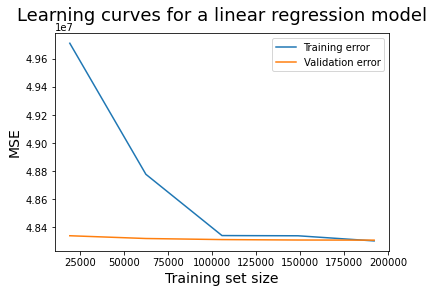

In [76]:
plt.plot(sizes, train_scores_mean, label = 'Training error')
plt.plot(sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()

- Validation error seems to stay consistent for all the training sizes
- Training error reduces rapidly and plateaus past 100,0000

### Model Selection

### Hyperparameter Tuning

In [77]:
from sklearn.model_selection import KFold, GridSearchCV
kf = KFold(n_splits=5, shuffle=True)

reg = LinearRegression()
parameters = {"normalize":[True, False],
              "fit_intercept": [True, False]
             }

grid = GridSearchCV(estimator=reg, param_grid = parameters, cv = kf, 
                    scoring='r2')
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='r2')

In [78]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.070586,0.008403,0.006054,0.000388,True,True,"{'fit_intercept': True, 'normalize': True}",0.906174,0.906532,0.905158,0.905249,0.907260,0.906075,0.000793,1
1,0.089598,0.014505,0.008389,0.002963,True,False,"{'fit_intercept': True, 'normalize': False}",0.906174,0.906532,0.905158,0.905249,0.907260,0.906075,0.000793,1
2,0.079997,0.016882,0.007339,0.000837,False,True,"{'fit_intercept': False, 'normalize': True}",0.774321,0.776011,0.771148,0.768277,0.773473,0.772646,0.002689,3
3,0.062370,0.002145,0.006826,0.000681,False,False,"{'fit_intercept': False, 'normalize': False}",0.774321,0.776011,0.771148,0.768277,0.773473,0.772646,0.002689,3


In [79]:
print("Best Score: ", grid.best_score_)
print("Best Params: ", grid.best_params_)

Best Score:  0.9060745408273163
Best Params:  {'fit_intercept': True, 'normalize': True}


In [80]:
reg_best = LinearRegression(fit_intercept= True, normalize= True).fit(X_train, y_train)
print("Training score: ", reg_best.score(X_train, y_train))
print("Testing score: ", reg_best.score(X_test, y_test))

Training score:  0.9060904938998089
Testing score:  0.907456230635171


In [81]:
y_pred = reg_best.predict(X_test)

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: ", mean_absolute_error(y_test, y_pred))


RMSE:  6926.593378047883
MAE:  4556.692458302818


### Algorithm Selection: varying the degree of polynomial regression

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [84]:
pipe = Pipeline(steps=[
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression(fit_intercept= True, normalize= True)),])

poly_search = GridSearchCV(
    estimator=pipe,
    param_grid={'poly__degree': [1,2,3,4,5]},
    scoring='r2', verbose = 2,
    cv=kf
)
poly_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .....................................poly__degree=1; total time=   0.1s
[CV] END .....................................poly__degree=1; total time=   0.1s
[CV] END .....................................poly__degree=1; total time=   0.1s
[CV] END .....................................poly__degree=1; total time=   0.1s
[CV] END .....................................poly__degree=1; total time=   0.1s
[CV] END .....................................poly__degree=2; total time=   0.8s
[CV] END .....................................poly__degree=2; total time=   0.9s
[CV] END .....................................poly__degree=2; total time=   0.9s
[CV] END .....................................poly__degree=2; total time=   0.9s
[CV] END .....................................poly__degree=2; total time=   0.8s
[CV] END .....................................poly__degree=3; total time=   4.0s
[CV] END .....................................pol

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model',
                                        LinearRegression(normalize=True))]),
             param_grid={'poly__degree': [1, 2, 3, 4, 5]}, scoring='r2',
             verbose=2)

In [85]:
pd.DataFrame(poly_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.109703,0.012003,0.010484,0.001026,1,{'poly__degree': 1},0.906469,0.907254,0.905444,0.905294,0.905907,0.906074,0.000719,5
1,0.800741,0.064279,0.047407,0.002334,2,{'poly__degree': 2},0.940043,0.939807,0.939151,0.939441,0.939663,0.939621,0.000306,4
2,3.722707,0.234814,0.130813,0.007711,3,{'poly__degree': 3},0.947767,0.947278,0.946992,0.947333,0.947194,0.947313,0.000255,3
3,14.165010,0.257973,0.355108,0.004138,4,{'poly__degree': 4},0.953658,0.953692,0.953356,0.953197,0.953345,0.953450,0.000193,2
4,70.947259,3.035519,0.868603,0.054155,5,{'poly__degree': 5},0.960055,0.960073,0.959855,0.959767,0.959763,0.959903,0.000136,1


In [86]:
print("Best Score: ", poly_search.best_score_)
print("Best Params: ", poly_search.best_params_)

Best Score:  0.9599026749776082
Best Params:  {'poly__degree': 5}


In [87]:
poly_best = poly_search.best_estimator_.fit(X_train,y_train)
print("Training score: ", poly_best.score(X_train, y_train))
print("Testing score: ", poly_best.score(X_test, y_test))

Training score:  0.9606690744782937
Testing score:  0.9603967592916827


In [88]:
y_pred = poly_best.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: ", mean_absolute_error(y_test, y_pred))

RMSE:  4531.181554654489
MAE:  2768.7977569661925


__Polynomial Degree 5 seems to have the best score, is this the result of overfitting?__

In [94]:
from sklearn.model_selection import validation_curve
degrees = np.arange(1, 6)
model = Pipeline(steps=[
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression(fit_intercept= True, normalize= True)),])

In [95]:
# on whole dataset
train_scores, validation_scores = validation_curve(
                 model, X, y,
                 param_name='poly__degree',
                 param_range=degrees, verbose = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END .....................................poly__degree=1; total time=   0.2s
[CV] END .....................................poly__degree=2; total time=   0.9s
[CV] END .....................................poly__degree=3; total time=   5.2s
[CV] END .....................................poly__degree=4; total time=  16.9s
[CV] END .....................................poly__degree=5; total time= 1.6min
[CV] END .....................................poly__degree=1; total time=   0.1s
[CV] END .....................................poly__degree=2; total time=   0.9s
[CV] END .....................................poly__degree=3; total time=   4.4s
[CV] END .....................................poly__degree=4; total time=  18.4s
[CV] END .....................................poly__degree=5; total time= 1.6min
[CV] END .....................................poly__degree=1; total time=   0.1s
[CV] END .....................................poly__degree=2; total time=   0.9s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 10.3min finished


In [96]:
train_scores, validation_scores

(array([[0.90080151, 0.90124967, 0.90156539, 0.91799955, 0.89291134],
        [0.9356412 , 0.93630913, 0.93632711, 0.94466548, 0.93905798],
        [0.94379859, 0.9442592 , 0.94432716, 0.95290152, 0.94735647],
        [0.95149377, 0.95202656, 0.95204425, 0.95911391, 0.95786322],
        [0.95847201, 0.95891183, 0.95886898, 0.9647346 , 0.966418  ]]),
 array([[-1.43023956e-01, -1.25270974e-01, -1.17464736e-01,
          8.40537017e-01,  8.42682075e-02],
        [ 4.18667441e-01,  2.34186930e-01,  3.90301581e-01,
          9.06656062e-01,  3.04869002e-01],
        [ 5.12781271e-01,  2.76802182e-01,  4.90886954e-01,
          9.09630791e-01, -2.61589780e+21],
        [ 1.66539343e-01, -8.68849387e+00, -2.36432127e+00,
          8.97495921e-01, -3.02654898e+20],
        [ 1.64083967e-01, -5.23895080e+00, -6.65190361e-01,
         -3.77982611e+12, -5.26131543e+20]]))

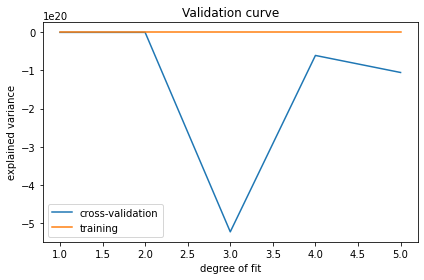

In [97]:
plt.figure(figsize=(6, 4))
plt.plot(degrees, validation_scores.mean(axis=1),
         label='cross-validation')
plt.plot(degrees, train_scores.mean(axis=1), label='training')

plt.legend(loc='best')
plt.xlabel('degree of fit')
plt.ylabel('explained variance')
plt.title('Validation curve')
plt.tight_layout()

- Training score is consistent throughut but degrees 1-2 seem to have better validation scores.
- Degree 5, validation score decreases -> overfitting?

In [102]:
validation_scores.mean(axis=1)

array([ 1.07809112e-01,  4.50936203e-01, -5.23179561e+20, -6.05309796e+19,
       -1.05226309e+20])

In [108]:
training_scores.mean(axis=1)

array([-49712910.78450105, -48778293.02136831, -48341294.4529439 ,
       -48339762.51682778, -48303139.75913671])

In [107]:
np.argmax(validation_scores.mean(axis=1))

1

__Degree 2 polynomial has highest validation score (closest to training score)__

In [110]:
model = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree = 2, include_bias=False)),
    ('model', LinearRegression(fit_intercept= True, normalize= True)),])
model.fit(X_train, y_train)
print("Training score: ", model.score(X_train, y_train))
print("Testing score: ",model.score(X_test, y_test))

Training score:  0.9396657908111644
Testing score:  0.9407417450458505


In [111]:
y_pred = model.predict(X_test)

In [112]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: ", mean_absolute_error(y_test, y_pred))

RMSE:  5542.689243823351
MAE:  3497.8502678844557
